# STEP 0: Installing Anaconda Navigator

If it is okay for you; we strongly recommend installing anaconda navigator (needs only around 2.5GB of storage and then you have everything)



--> Link for download: https://www.anaconda.com/distribution/#macos

--> Link for usage: https://docs.anaconda.com/anaconda/navigator/



STEPS installation: 

1) Select your operating system (Windows, Linux or MacOS)

2) Download Python3.7 (I would recoomend that version; but 2.7 in case is also possible) --> this will take around 6 Minutes

3) Follow the instructions in the pop-up

4) Open Anaconda Navigator

5) Open Jupyter to make a documented notebook

# STEP 1: Importing the data and investigate it

In [1]:
#Import libraries (similar to library(X) in R)
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

In [3]:
# Import cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() #getting the data form int cluster (also DKFZ can be used)

In [4]:
#Getting the key attributes (similar to names(X) in R)
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
#Processing a df for feed into the SVM --> what you can do to get some kind of nice matrix is transform the data into a pandas Dataframe (this is a very convenient structure for looking at data in matrix format)
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [6]:
df_cancer.head() #in a DATAFRAME!!! you can use head and tail to look at your data in a nice matrix-format

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890     0.0  
1          0.2750                  0.08902     0.0  
2          0.3613                  0.08758     0.0  
3          0.6638                  0.17300     0.0  
4          0.2364                  0.07678     0.0  

[5 rows x 31 columns]

In [7]:
df_cancer.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115     0.0  
565                0.1628          0.2572                  0.06637     0.0  
566                0.1418          0.2218                  0.07820     0.0  
567                0.2650          0.4087                  0.12400     0.0  
568                0.0000          0.2871                  0.07039     1.0  

[5 rows x 31 columns]

# STEP 2: VISUALIZING THE DATA (make use of seaborn; similar to ggplot2!) 

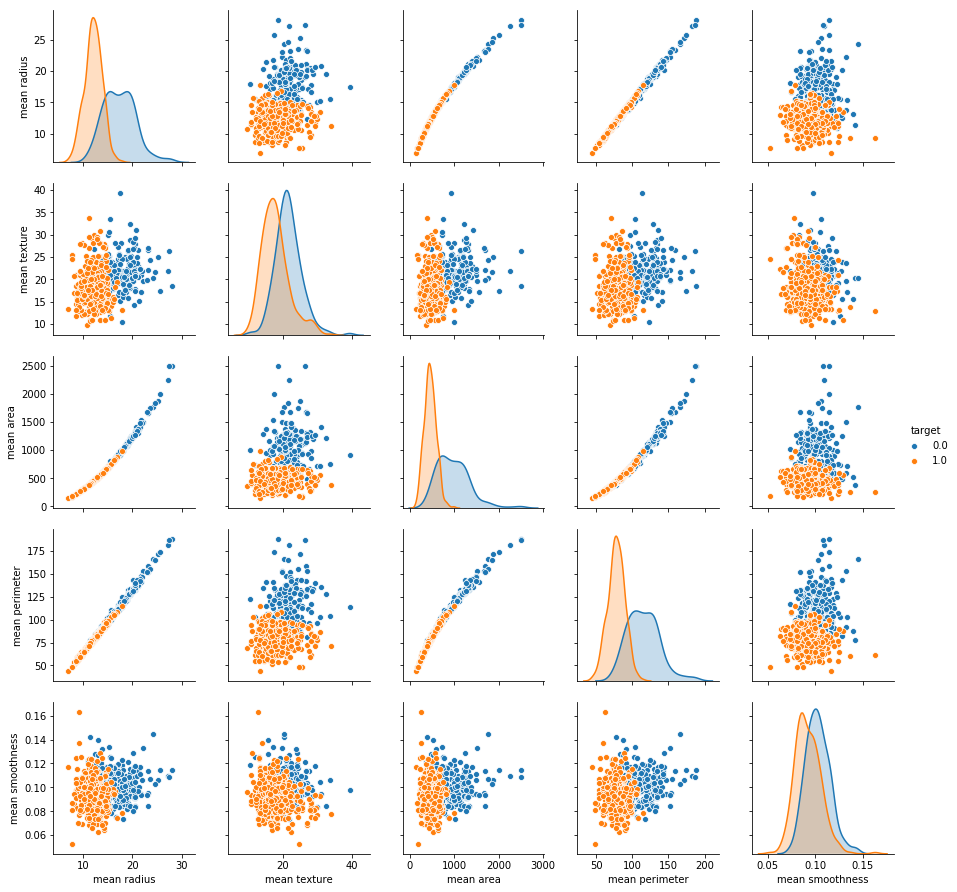

In [9]:
#Making predictions (only with 5 Parameters) --> 0: malignent, 1: benigne
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

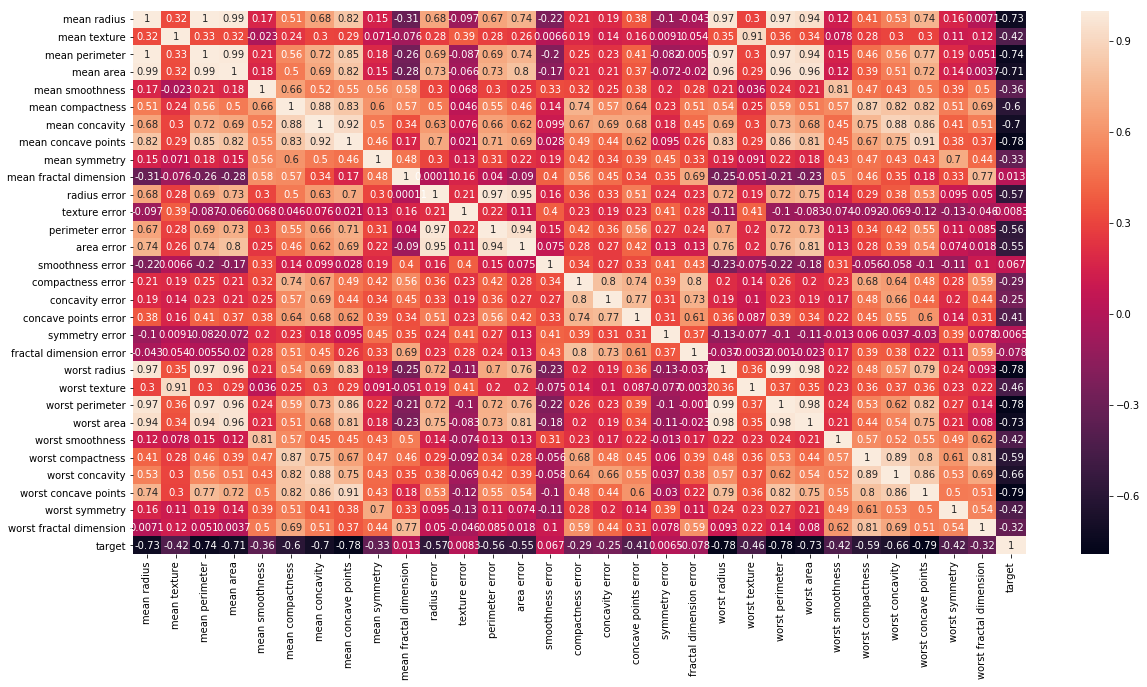

In [8]:
#Making a correlation diagramm (also known as heatmap)
plt.figure(figsize=(20,10))  #define the figure size
sns.heatmap(df_cancer.corr(), annot=True) #with annot you can define if you want to have the correlation value in the plot or not; with .corr() you can get the correlation of data in matrix-format

# Structure your code: Heading 1 (simply select; Heading in the markdown area)

## Heading 2 

### Heading 3 

In [13]:
#Link for some information to formatting jupyter notebooks
#--> https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#Headings


In [12]:
#Visual Studio might be a useful editor: 
#--> Link for download: https://www.chip.de/downloads/Visual-Studio-2019-Community_36594360.html
#--> it is also possible to install it via anaconda navigator!!!